In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# set theme
sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (7.0, 3.5),
        "savefig.dpi": 300,
        "figure.autolayout": True,
    },
)


fig_path = Path("../figures")

# Load Data

In [4]:
dfs = []
for policy_path in (fig_path / "test_results").iterdir():
    if not policy_path.is_dir():
        continue
    rewards = np.load(policy_path / "rewards.npy")
    n_trials, n_steps = rewards.shape
    trial_idx, step_idx = np.mgrid[:n_trials, :n_steps]
    dfs.append(
        pd.DataFrame(
            {
                "policy": policy_path.name,
                "trial_idx": trial_idx.flatten(),
                "step_idx": step_idx.flatten(),
                "reward": rewards.flatten(),
            }
        )
    )
df = pd.concat(dfs)
df.head()

,policy,trial_idx,step_idx,reward
0,1sybsz6w-200_agents,0,0,0.033772
1,1sybsz6w-200_agents,0,1,0.037400
2,1sybsz6w-200_agents,0,2,0.044236
3,1sybsz6w-200_agents,0,3,0.051723
4,1sybsz6w-200_agents,0,4,0.061879


# Plot

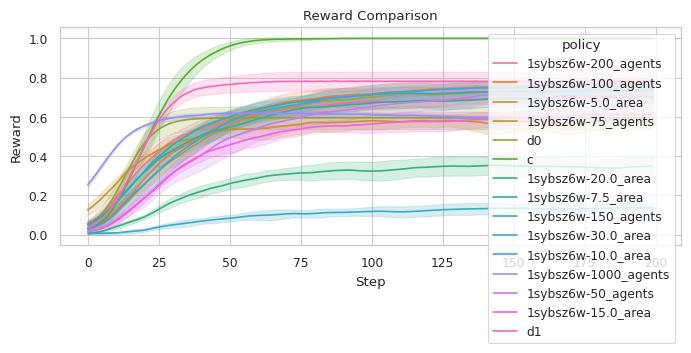

In [5]:
# Create the line plot
sns.lineplot(
    data=df,
    x="step_idx",
    y="reward",
    hue="policy",
    errorbar="sd",
)
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Reward Comparison")

# Save the plot
plt.savefig(fig_path / "comparison.png")
plt.savefig(fig_path / "comparison.pdf")
plt.show()